In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#lat_lngs = zip(lats, lngs)
lat_lngs = [pair for pair in zip(lats, lngs)]
lat_lngs

[(6.853203822665122, -175.18665105949245),
 (65.62775894763013, 25.436327676092617),
 (-87.03956099846805, -24.65105277780151),
 (-8.629477905739577, -87.51531039131508),
 (-14.327067517864634, 8.484423796441178),
 (25.63439598910439, 130.47331202845152),
 (-20.7795035929947, -70.19517858783587),
 (-48.948039289776695, 172.48314560539495),
 (-6.644205834419523, -132.5584295603128),
 (-3.8004102543701634, 114.2447907071105),
 (-22.809955684777222, -101.50632167877485),
 (-85.86260684874722, 35.604783961230765),
 (15.969655607182588, -59.087573975150974),
 (-54.32232994084798, -156.18572331918938),
 (44.31181882856876, -83.53576749275456),
 (-67.4459598903774, 169.7381412054192),
 (-22.10130132266481, 53.94554908117786),
 (-60.379626486645876, 166.88116288077578),
 (-10.260700122206202, -99.41656574385733),
 (28.419242418522344, -19.834154475053225),
 (59.58380019409702, -117.08045429599917),
 (47.64110579599139, 84.99538509138102),
 (-65.22275733031644, -31.129526400949203),
 (88.634510

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(6.853203822665122, -175.18665105949245),
 (65.62775894763013, 25.436327676092617),
 (-87.03956099846805, -24.65105277780151),
 (-8.629477905739577, -87.51531039131508),
 (-14.327067517864634, 8.484423796441178),
 (25.63439598910439, 130.47331202845152),
 (-20.7795035929947, -70.19517858783587),
 (-48.948039289776695, 172.48314560539495),
 (-6.644205834419523, -132.5584295603128),
 (-3.8004102543701634, 114.2447907071105),
 (-22.809955684777222, -101.50632167877485),
 (-85.86260684874722, 35.604783961230765),
 (15.969655607182588, -59.087573975150974),
 (-54.32232994084798, -156.18572331918938),
 (44.31181882856876, -83.53576749275456),
 (-67.4459598903774, 169.7381412054192),
 (-22.10130132266481, 53.94554908117786),
 (-60.379626486645876, 166.88116288077578),
 (-10.260700122206202, -99.41656574385733),
 (28.419242418522344, -19.834154475053225),
 (59.58380019409702, -117.08045429599917),
 (47.64110579599139, 84.99538509138102),
 (-65.22275733031644, -31.129526400949203),
 (88.634510

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 1 | haukipudas
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | paita
Processing Record 5 of Set 1 | namibe
Processing Record 6 of Set 1 | nago
Processing Record 7 of Set 1 | iquique
Processing Record 8 of Set 1 | dunedin
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | banjarmasin
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | saint-francois
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | alpena
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | saint-leu
Processing Record 18 of Set 1 | los llanos de aridane
Processing Record 19 of Set 1 | high level
Processing Record 20 of Set 1 | zaysan
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | narsaq
Pr

Processing Record 31 of Set 8 | kovur
Processing Record 32 of Set 8 | kostomuksha
Processing Record 33 of Set 8 | douentza
Processing Record 34 of Set 8 | luganville
Processing Record 35 of Set 8 | pangnirtung
Processing Record 36 of Set 8 | kavaratti
Processing Record 37 of Set 8 | coquimbo
Processing Record 38 of Set 8 | goundam
Processing Record 39 of Set 8 | lasa
Processing Record 40 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 41 of Set 8 | collie
Processing Record 42 of Set 8 | kalmunai
Processing Record 43 of Set 8 | venado tuerto
Processing Record 44 of Set 8 | kishi
Processing Record 45 of Set 8 | pecos
Processing Record 46 of Set 8 | lagunas
Processing Record 47 of Set 8 | sambava
Processing Record 48 of Set 8 | morrope
Processing Record 49 of Set 8 | dmitrovsk-orlovskiy
Processing Record 50 of Set 8 | avera
Processing Record 1 of Set 9 | mabaruma
Processing Record 2 of Set 9 | roma
Processing Record 3 of Set 9 | khonuu
City not found. Skipping...
Pr

Processing Record 19 of Set 12 | bonavista
Processing Record 20 of Set 12 | ourossogui
Processing Record 21 of Set 12 | bonthe
Processing Record 22 of Set 12 | osypenko
Processing Record 23 of Set 12 | waipawa
Processing Record 24 of Set 12 | bjornevatn
Processing Record 25 of Set 12 | road town
Processing Record 26 of Set 12 | darhan
Processing Record 27 of Set 12 | lufilufi
Processing Record 28 of Set 12 | qurayyat
Processing Record 29 of Set 12 | cururupu
Processing Record 30 of Set 12 | floro
Processing Record 31 of Set 12 | marathon
Processing Record 32 of Set 12 | huazhou
Processing Record 33 of Set 12 | pochutla
Processing Record 34 of Set 12 | alcaniz
Processing Record 35 of Set 12 | la ronge
Processing Record 36 of Set 12 | tacoronte
Processing Record 37 of Set 12 | winnemucca
Processing Record 38 of Set 12 | aykhal
Processing Record 39 of Set 12 | tsabong
Processing Record 40 of Set 12 | peniche
Processing Record 41 of Set 12 | faya
Processing Record 42 of Set 12 | mtwara
Pro

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Haukipudas,65.1765,25.3523,12.99,92,90,6.91,FI,2021-02-03 23:10:00
1,Ushuaia,-54.8000,-68.3000,51.80,66,75,6.91,AR,2021-02-03 23:10:00
2,Paita,-5.0892,-81.1144,77.00,69,0,13.80,PE,2021-02-03 23:08:13
3,Namibe,-15.1961,12.1522,72.05,72,99,8.88,AO,2021-02-03 23:06:24
4,Nago,26.5881,127.9761,60.80,93,1,6.91,JP,2021-02-03 23:10:00
5,Iquique,-20.2208,-70.1431,71.60,56,40,10.36,CL,2021-02-03 23:07:37
6,Dunedin,-45.8742,170.5036,55.00,65,61,10.00,NZ,2021-02-03 23:07:34
7,Atuona,-9.8000,-139.0333,78.03,71,1,9.89,PF,2021-02-03 23:07:49
8,Banjarmasin,-3.3244,114.5910,73.40,100,20,2.30,ID,2021-02-03 23:05:45
9,Puerto Ayora,-0.7393,-90.3518,84.20,65,0,10.36,EC,2021-02-03 23:07:44


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Haukipudas,FI,2021-02-03 23:10:00,65.1765,25.3523,12.99,92,90,6.91
1,Ushuaia,AR,2021-02-03 23:10:00,-54.8000,-68.3000,51.80,66,75,6.91
2,Paita,PE,2021-02-03 23:08:13,-5.0892,-81.1144,77.00,69,0,13.80
3,Namibe,AO,2021-02-03 23:06:24,-15.1961,12.1522,72.05,72,99,8.88
4,Nago,JP,2021-02-03 23:10:00,26.5881,127.9761,60.80,93,1,6.91
...,...,...,...,...,...,...,...,...,...
565,Denpasar,ID,2021-02-03 23:11:17,-8.6500,115.2167,77.00,88,40,2.30
566,Manzhouli,CN,2021-02-03 23:11:17,49.6000,117.4333,-8.75,90,99,3.09
567,Ostrovnoy,RU,2021-02-03 23:11:18,68.0531,39.5131,13.19,93,100,13.47
568,Santa Cruz De La Palma,ES,2021-02-03 23:11:18,28.6835,-17.7642,64.40,72,90,5.93


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

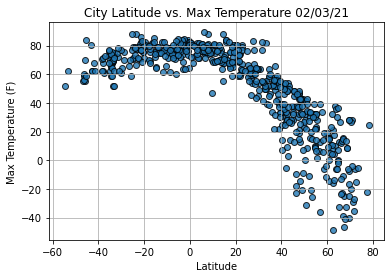

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

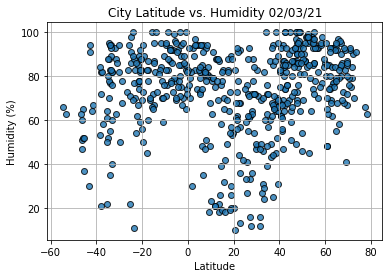

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

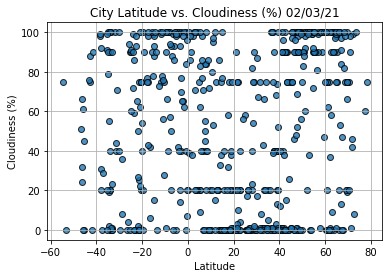

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

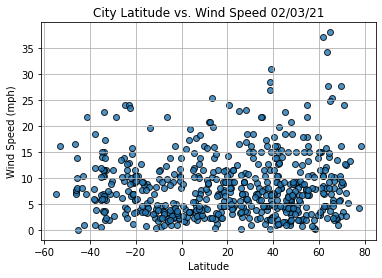

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Import linregress
    from scipy.stats import linregress

    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Alpena
Country                        US
Date          2021-02-03 23:10:02
Lat                       45.0617
Lng                      -83.4327
Max Temp                     28.4
Humidity                       59
Cloudiness                      1
Wind Speed                   4.12
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
565    False
566     True
567     True
568     True
569     True
Name: Lat, Length: 570, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Haukipudas,FI,2021-02-03 23:10:00,65.1765,25.3523,12.99,92,90,6.91
4,Nago,JP,2021-02-03 23:10:00,26.5881,127.9761,60.80,93,1,6.91
11,Saint-Francois,FR,2021-02-03 23:10:01,46.4154,3.9054,46.00,87,0,5.75
13,Alpena,US,2021-02-03 23:10:02,45.0617,-83.4327,28.40,59,1,4.12
16,Los Llanos De Aridane,ES,2021-02-03 23:08:12,28.6585,-17.9182,64.40,72,75,3.44


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [31]:
# Linear regression on the Northern Hemisphere
# comment
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))